In [3]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
# reading the data with all the columns visible
pd.options.display.max_columns=None
car = pd.read_csv("C:/Users/poona/OneDrive/Documents/POONAM/QUARTER 4/PREDICTIVE ANALYTICS/Midweek Project 2/CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# information about columns
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# shape of dataframe
car.shape

(205, 26)

In [9]:
# count of null values in every column
car.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# describing every column
car.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
#Data Cleaning and Standardization

In [11]:
# dropping duplicate rows if any
car.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
# carnames with their count in the data
car['CarName'].astype('category').value_counts()

peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

In [13]:
# Extracting Car Brand name from 'CarName' column and putting it into a new column called 'Brand'
def split(x):
    return x.split(' ')[0]

car['Brand'] = car['CarName'].apply(split)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
# count of car brands in the data
car['Brand'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: Brand, dtype: int64

In [15]:
# Converting all the Brand names to lowercase alphabets
car['Brand'] = car['Brand'].apply(lambda y: y.lower())

# corecting the wrongly marked data in the dataset
car.loc[(car['Brand'] == 'vw') | (car['Brand'] == 'vokswagen'),'Brand'] = 'volkswagen'
car.loc[(car['Brand'] == 'toyouta'),'Brand'] = 'toyota'
car.loc[(car['Brand'] == 'maxda'),'Brand'] = 'mazda'
car.loc[(car['Brand'] == 'porcshce'),'Brand'] = 'porsche'

In [16]:
# data in brand column after cleaning
car['Brand'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Brand, dtype: int64

In [17]:
# count of column cylinder number
car['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [18]:
# count of column doornumber
car['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
# a separate dataframe for numeric columns
numeric = car.select_dtypes(include=['int64','float64'])

In [20]:
# converting doornumber and cylindernumber from object to integer form
car['doornumber'] = car['doornumber'].map({'two':2,'four':4})
car['cylindernumber'] = car['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [21]:
# after conversion
car['cylindernumber'].astype('category').value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [22]:
# after conversion
car['doornumber'].astype('category').value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [23]:
car['enginetype'].astype('category').value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [24]:
# count of column fuelsystem
car['fuelsystem'].astype('category').value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [25]:
# count of column fueltype
car['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [26]:
# count of column aspiration
car['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [27]:
# count of column carbody
car['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [28]:
# count of column drivewheel
car['drivewheel'].astype('category').value_counts()
# count of column enginelocation
car['enginelocation'].astype('category').value_counts()
# count of column symboling
car['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [29]:
# dropping all the required columns
car.drop(columns=['CarName','car_ID','enginetype','fuelsystem','enginelocation','aspiration','fueltype'],axis=1,inplace=True)

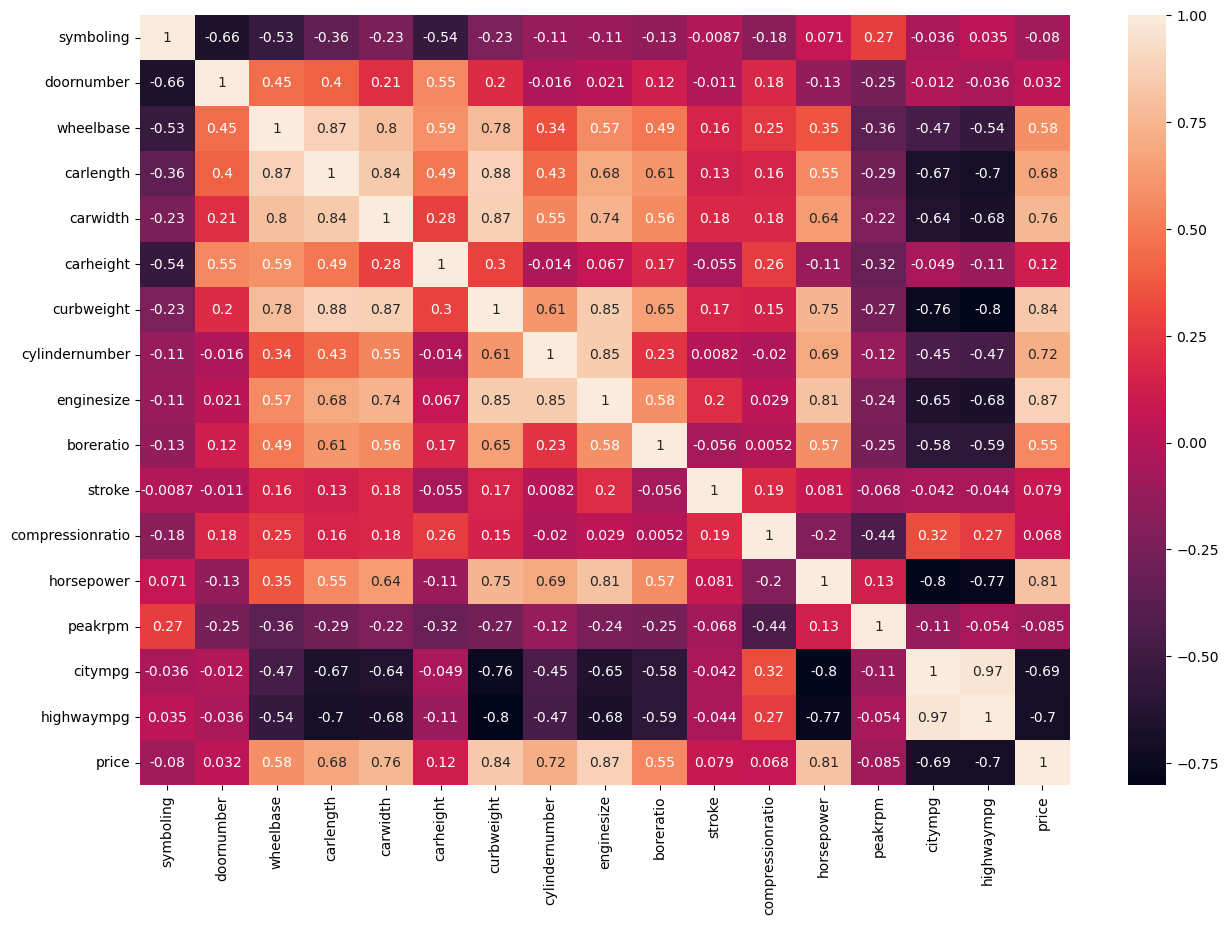

In [30]:
#Data Visualization
# heatmap to show the correlation beyween all numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(car.corr(),annot=True)
plt.show()

In [31]:
# dropping columns with low correlation with target column
car.drop(columns=['stroke','compressionratio','peakrpm'],axis=1,inplace=True)
car.head()

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,Brand
0,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,13495.0,alfa-romero
1,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,16500.0,alfa-romero
2,1,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,19,26,16500.0,alfa-romero
3,2,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,24,30,13950.0,audi
4,2,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,18,22,17450.0,audi


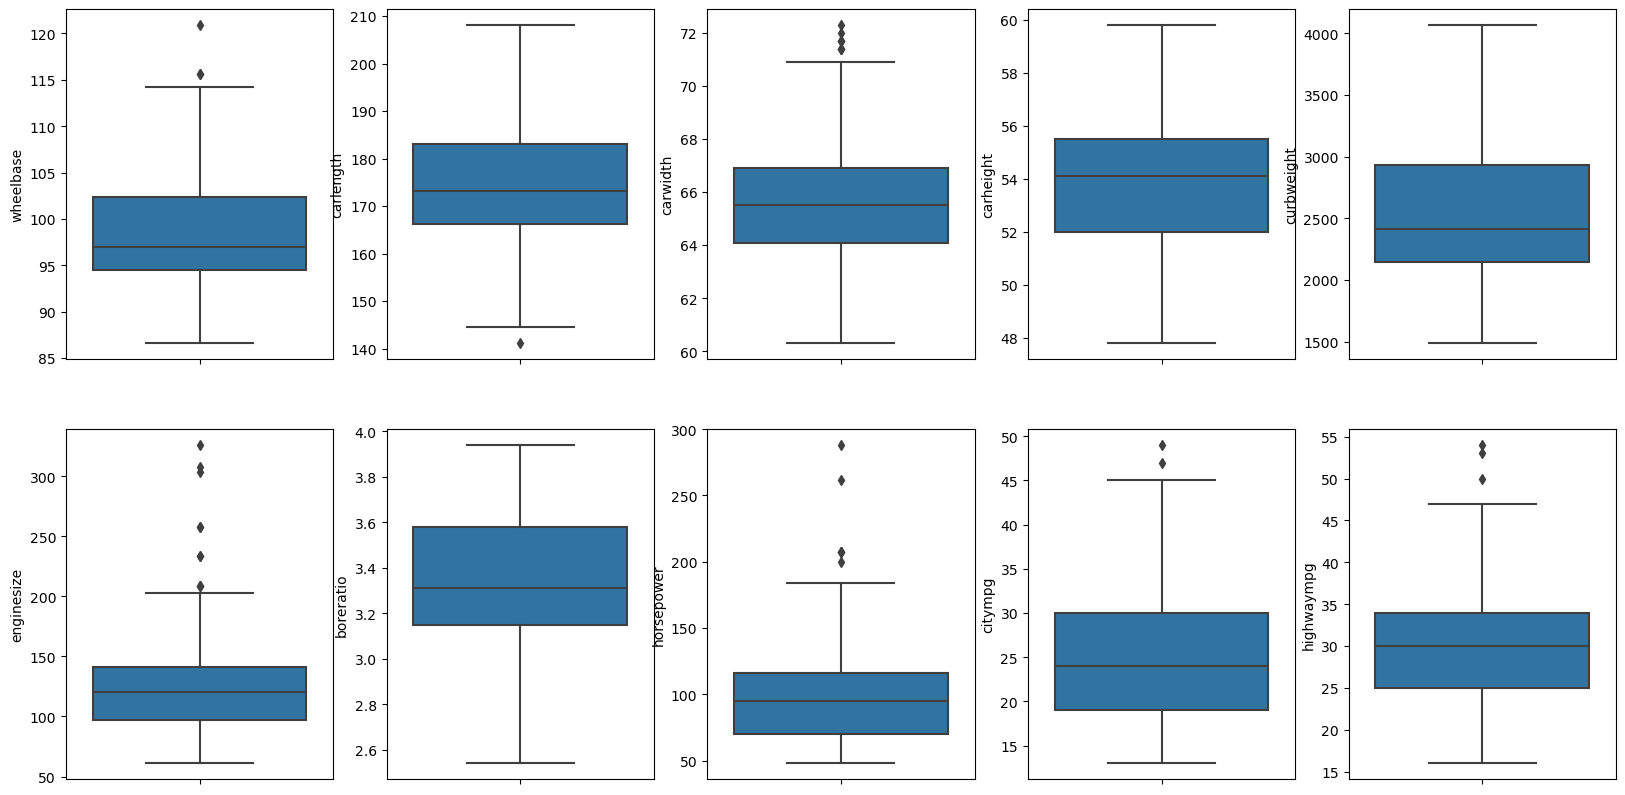

In [32]:
# plotting boxplot to identify outliers
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y='wheelbase',data=car)
plt.subplot(2,5,2)
sns.boxplot(y='carlength',data=car)
plt.subplot(2,5,3)
sns.boxplot(y='carwidth',data=car)
plt.subplot(2,5,4)
sns.boxplot(y='carheight',data=car)
plt.subplot(2,5,5)
sns.boxplot(y='curbweight',data=car)
plt.subplot(2,5,6)
sns.boxplot(y='enginesize',data=car)
plt.subplot(2,5,7)
sns.boxplot(y='boreratio',data=car)
plt.subplot(2,5,8)
sns.boxplot(y='horsepower',data=car)
plt.subplot(2,5,9)
sns.boxplot(y='citympg',data=car)
plt.subplot(2,5,10)
sns.boxplot(y='highwaympg',data=car)
plt.show()

In [33]:
# 25th and 75th percentile of the values in enginesize column
Q1_es = car.enginesize.quantile(0.25)
Q3_es = car.enginesize.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
car = car[(car.enginesize < upper_es)]
# 10 rows got deleted after the outliers removal
car.shape

(195, 17)

In [34]:
# quantiles for all the columns
Q1_hp = car.horsepower.quantile(0.25)
Q3_hp = car.horsepower.quantile(0.75)
Q1_cw = car.curbweight.quantile(0.25)
Q3_cw = car.curbweight.quantile(0.75)

# function definitions
def curb_convert(x):
    if x <= Q1_cw:
        return 'light'
    elif x < Q3_cw and x > Q1_cw:
        return 'moderate'
    else:
        return 'heavy'
        
def es_convert(x):
    if x <= Q1_es:
        return 'small'
    elif x < Q3_es and x > Q1_es:
        return 'medium'
    else:
        return 'large'
        
def hp_convert(x):
    if x <= Q1_hp:
        return 'low'
    elif x < Q3_hp and x > Q1_hp:
        return 'medium'
    else:
        return 'high'

# calling the functions
car['curbtype'] = car['curbweight'].apply(curb_convert)
car['engsize'] = car['enginesize'].apply(es_convert)
car['hptype'] = car['horsepower'].apply(hp_convert)
# all categorical columns or the columns with object dtype
categorical = car.select_dtypes(include=['object'])
categorical.head()

,carbody,drivewheel,Brand,curbtype,engsize,hptype
0,convertible,rwd,alfa-romero,moderate,medium,medium
1,convertible,rwd,alfa-romero,moderate,medium,medium
2,hatchback,rwd,alfa-romero,moderate,large,high
3,sedan,fwd,audi,moderate,medium,medium
4,sedan,4wd,audi,moderate,medium,medium


<AxesSubplot:xlabel='hptype', ylabel='price'>

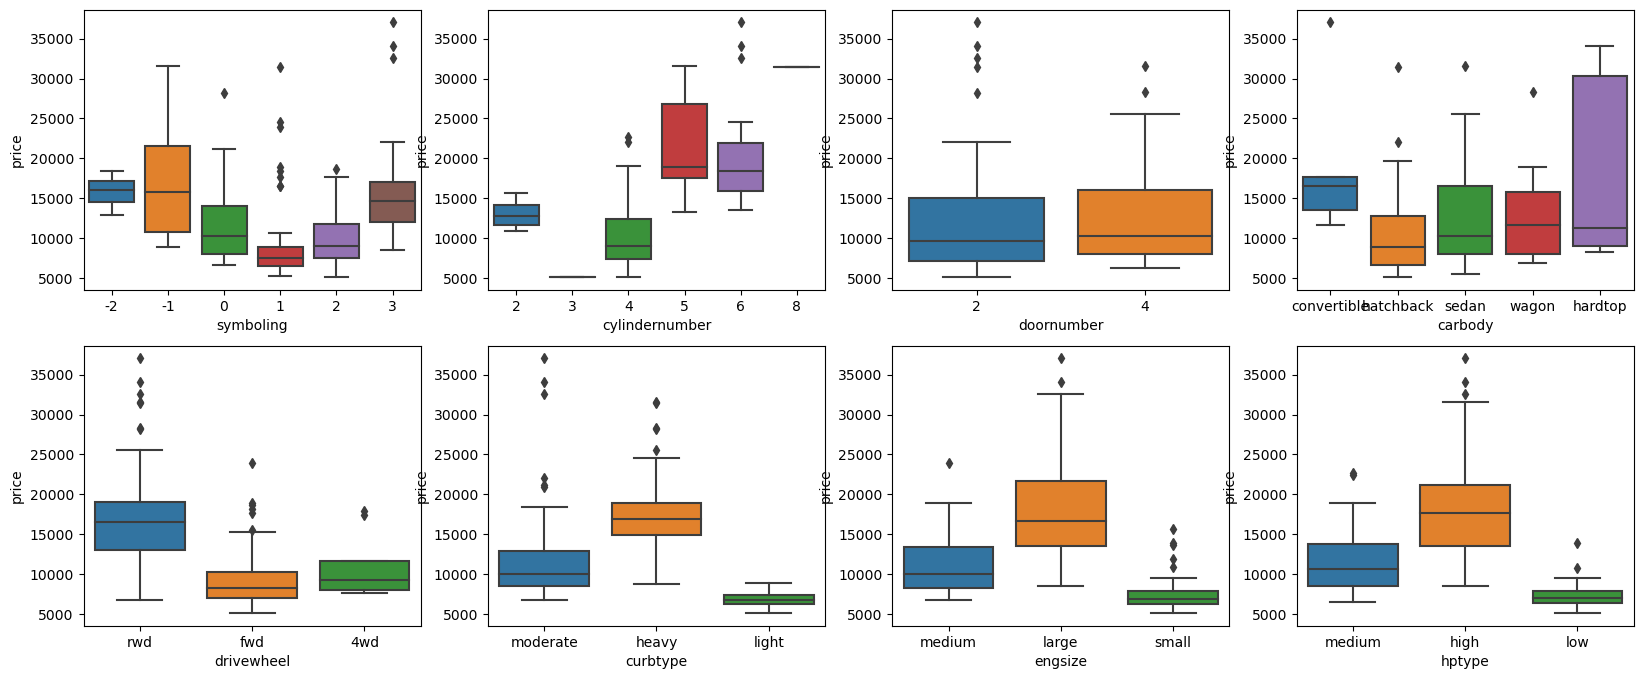

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
sns.boxplot(x='symboling',y='price',data=car)
plt.subplot(2,4,2)
sns.boxplot(x='cylindernumber',y='price',data=car)
plt.subplot(2,4,3)
sns.boxplot(x='doornumber',y='price',data=car)
plt.subplot(2,4,4)
sns.boxplot(x='carbody',y='price',data=car)
plt.subplot(2,4,5)
sns.boxplot(x='drivewheel',y='price',data=car)
plt.subplot(2,4,6)
sns.boxplot(x='curbtype',y='price',data=car)
plt.subplot(2,4,7)
sns.boxplot(x='engsize',y='price',data=car)
plt.subplot(2,4,8)
sns.boxplot(x='hptype',y='price',data=car)

<AxesSubplot:xlabel='Brand', ylabel='price'>

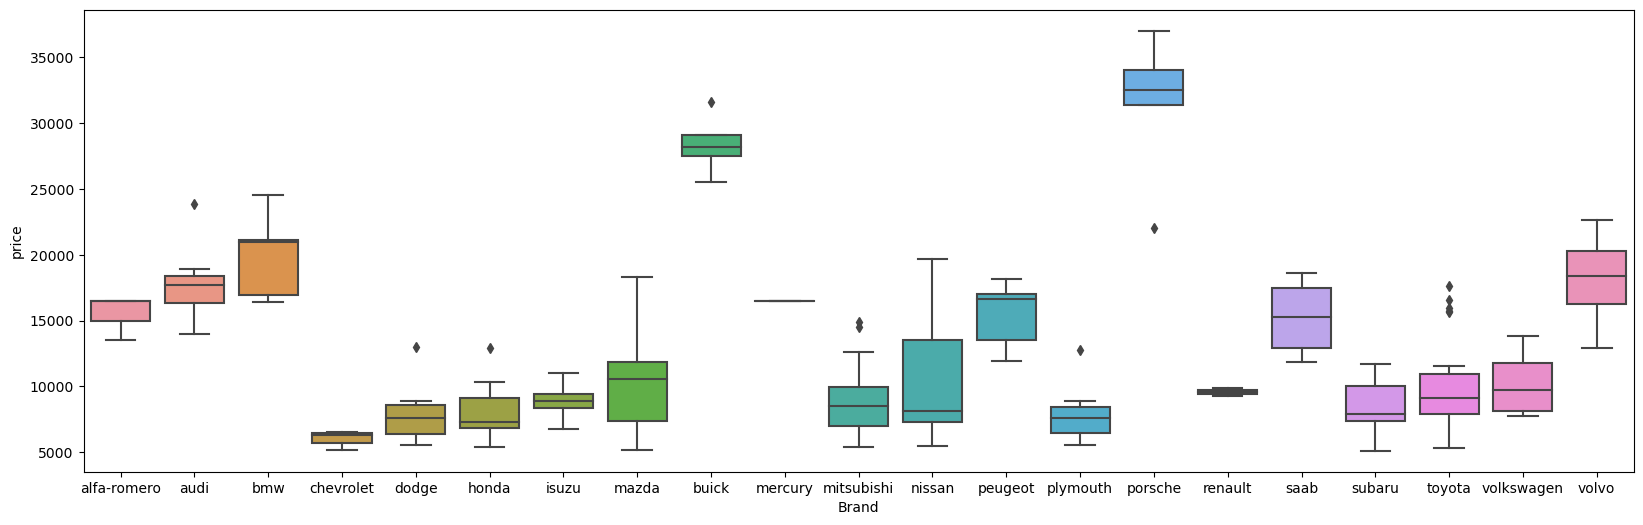

In [37]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Brand',y='price',data=car)

In [38]:
# converting to dummies
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [39]:
# concat the dummies dataframe to the main dataframe
car = pd.concat([car,dummies],axis=1)

# dropping all the categorical columns as the dummies are already created
car.drop(columns=categorical.columns,axis=1,inplace=True)
car.head()
car.shape

(195, 46)

In [40]:
#Model building
# splitting the main data into train and test data
car_train, car_test = train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)
x_train = car_train.drop('price',1)
y_train = car_train['price']

In [41]:
# scaler object
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,0.938539,0.862316,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,0.128117,-0.263558,-0.182816,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,4.654747,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,-1.500467,0.862316,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,0.513884,-0.430274,-0.505713,-0.150188,-0.738549,-0.928985,2.481511,-1.270978,1.470643,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.751542,-1.159667,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,1.510452,-1.097138,-1.151506,-0.150188,1.354006,-0.928985,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,3.756476,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,-0.687465,0.862316,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,-0.257651,-0.430274,-0.021368,-0.150188,-0.738549,-0.928985,2.481511,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,8.185353,-0.122169,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,0.938539,0.862316,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,0.385295,-0.763706,-0.505713,-0.150188,-0.738549,1.076443,-0.402980,0.786796,-0.679975,-0.214834,-0.174078,-0.150188,-0.122169,-0.266207,-0.266207,-0.122169,-0.352089,0.0,-0.266207,-0.281718,-0.266207,-0.214834,-0.122169,-0.122169,8.185353,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [42]:
#Building the first Linear Regression model with all the features
lm = LinearRegression()
lm.fit(x_train,y_train)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lm.score(x_train,y_train)

0.9649285454615241

In [ ]:
#The model is currently 96.4% accurate which is a very good value during model building.

In [ ]:
####